## Data Analysis
### Run details:
+ NS_max_iter 10000000 
+ NS_sampling_efficiency 0.15
+ NS_evidence_tolerance 0.8
+ NS_n_live_points 1000 


In [1]:
#Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist, IPython
import pylab as plt
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True

import numpy as np 

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
GetDist Version: 1.1.3, Matplotlib version: 3.3.4


In [2]:
names_planck  = ['omega_cdm', 'S_8', 'omega_b', 'n_s', 'h', 'Omega_m', 'sigma8']
labels_planck = [r'\omega_{\rm{cdm}}', r'S_{\rm{8}}', r'\omega_{\rm{b}}', r'n_{\rm{s}}',
              'h', r'\Omega_{\rm{m}}', r'\sigma_{\rm{8}}']

names_k1k  = ['omega_cdm', 'S_8', 'omega_b', 'n_s', 'h', 'Omega_m', 'sigma8'] 
labels_k1k = [r'\omega_{\rm{cdm}}', r'S_{\rm{8}}', r'\omega_{\rm{b}}', r'n_{\rm{s}}',
              'h', r'\Omega_{\rm{m}}', r'\sigma_{\rm{8}}'] 

names_comp = ['S8_geo', 'Omega_m_geo', 'sigma8_geo', 'S8_gro', 'Omega_m_gro', 'sigma8_gro']
labels_comp = [r'S_{\rm{8}}^{\rm{geom}}',  r'\Omega_{\rm{m}}^{\rm{geom}}', r'\sigma_{\rm{8}}^{\rm{geom}}',
               r'S_{\rm{8}}^{\rm{grow}}',  r'\Omega_{\rm{m}}^{\rm{grow}}', r'\sigma_{\rm{8}}^{\rm{grow}}']

In [3]:
planck1 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)



In [4]:
planck_params = []
for item in planck_tot:
    planck_params.append([item[3], item[35], item[2],  item[7], item[29]/100, item[31], item[34]])
planck_params = np.array(planck_params)
planck= MCSamples(samples=planck_params, names = names_planck, labels = labels_planck, label= r'$Planck$ 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


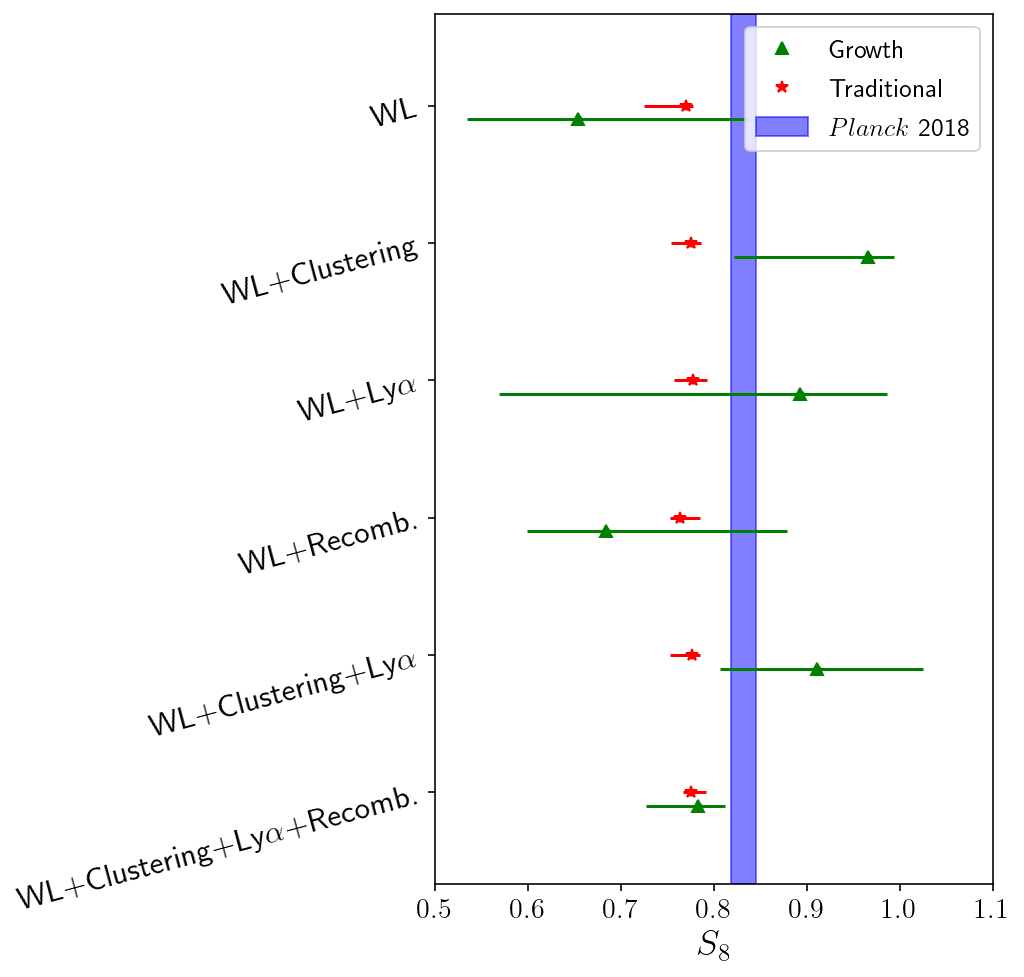

In [5]:
y = [0,3,6,9,12,15]
y_1 = [0.3, 3.3 ,6.3 ,9.3, 12.3, 15.3 ]
#y_2 = [-0.3, 2.7 ,5.7 ,8.7, 11.7, 14.7 ]
my_yticks = ['WL', 'WL+Clustering', r'WL+Ly$\alpha$', r'WL+Recomb.', 
             r'WL+Clustering+Ly$\alpha$', r'WL+Clustering+Ly$\alpha$+Recomb.']

S8 = [0.7702132, 0.7761267,  0.7779783, 0.7642852, 0.7765731, 0.7755883]
S8_err = [[0.7248134774610477, 0.7777705072455087], [0.7539940644046176, 0.7859778489000613],
          [0.7574672739901569, 0.7928188268673858], [0.7529480265968269, 0.7851011265759915],
          [0.7534095043786152, 0.7857879969482283], [0.7673325619943326, 0.7914235919454251]]

S8_gro = [0.6544201, 0.9664795, 0.8933472,  0.6840435, 0.9110773, 0.7832451]
S8_gro_err = [[0.5344430396638886, 0.8370487589639941], [0.8217310495407485, 0.9936335252910454],
              [0.5689035327000396, 0.9860877478156941], [0.5995004815391675, 0.878618148104084],
              [0.8063495307861008, 1.0248314685719178], [0.7271242789219665, 0.8126198999255005]]


for counter, entry in enumerate(S8_err):
    entry[0] = S8[counter]-entry[0]
    entry[1] = -S8[counter]+entry[1]

for counter, entry in enumerate(S8_gro_err):
    entry[0] = S8_gro[counter]-entry[0]
    entry[1] = -S8_gro[counter]+entry[1]
    
#for counter, entry in enumerate(S8_geo_err):
#    entry[0] = S8_geo[counter]-entry[0]
#    entry[1] = -S8_geo[counter]+entry[1]

    
plt.figure(figsize=(5,8))
    

plt.xlabel(r'$S_{\rm{8}}$', fontsize=18)

plt.errorbar( S8, y, xerr=np.transpose(S8_err), fmt='r.')
#plt.errorbar(S8_geo, y_1,   xerr=np.transpose(S8_geo_err), fmt='k.')
plt.errorbar( S8_gro, y_1,  xerr=np.transpose(S8_gro_err), fmt='g.')

#plt.plot( S8_geo, y_1, 'k^', label='Geometry')
plt.plot( S8_gro, y_1, 'g^', label='Growth')
plt.plot( S8, y, 'r*', label='Traditional')

plt.axvspan(0.832 - 0.013, 0.832 + 0.013, alpha = 0.5, color='b',  label= r'$Planck$ 2018')

plt.legend(loc = 1, prop={'size': 13})

plt.axis([0.5, 1.1,  17,-2,])


plt.yticks(y, my_yticks, fontsize=16)
plt.yticks(rotation=15)

plt.xticks(fontsize=14)


plt.show()

In [6]:
def munch_1cosmo_appendix(path, names, labels, name):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = cols[2:9]
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=names, labels=labels, label = name,
                        weights=weights, loglikes=loglikes)
    return samples

In [7]:
def munch_1cosmo(path, names, labels, name):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = np.append(cols[2:7], cols[-2:], axis=0)
    #param_cols = np.append(param_cols, [cols[8]], axis=0)
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=names, labels=labels, label = name,
                        weights=weights, loglikes=loglikes)
    return samples

In [8]:
def munch_2cosmo(path, names, labels, name):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights =  cols[0]
    param_cols_gro = np.append(cols[2:7], cols[-4:-2], axis=0)
    #param_cols_gro = np.append(param_cols_gro, [cols[13]], axis=0)
    param_rows_gro = np.transpose(param_cols_gro)
    param_cols_geo = np.append(cols[7:12], cols[-2:], axis=0)
    #param_cols_geo = np.append(param_cols_geo, [cols[13]], axis=0)
    param_rows_geo = np.transpose(param_cols_geo)
        
    samples_gro = MCSamples(samples=param_rows_gro, names=names, labels=labels, label=name+' grow.', 
                        weights=weights, loglikes=loglikes)
    samples_geo = MCSamples(samples=param_rows_geo, names=names, labels=labels, label=name+' geom.',
                        weights=weights, loglikes=loglikes)
    
    return samples_gro, samples_geo
    

In [9]:
def munch_comp(path, names, labels, name):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights =  cols[0]
    param_cols_gro = np.append([cols[3]], cols[-4:-2], axis=0)
    param_cols_geo = np.append([cols[8]], cols[-2:], axis=0)
    comp_cols = np.append(param_cols_geo, param_cols_gro, axis=0)
    comp_rows = np.transpose(comp_cols)
        
    samples = MCSamples(samples=comp_rows, names=names, labels=labels, label=name+' grow.', 
                        weights=weights, loglikes=loglikes)
    return samples
    

In [10]:
BOSS = munch_1cosmo_appendix('Cl', names_planck, labels_planck, 'Clustering')
Lya = munch_1cosmo_appendix('Ly', names_planck, labels_planck, r'Ly$\alpha$')
CMB = munch_1cosmo_appendix('CMB', names_planck, labels_planck, 'Recomb.')

Removed no burn in
Removed no burn in
Removed no burn in


In [11]:
K1K = munch_1cosmo('K1K_1c', names_k1k, labels_k1k, 'WL')
K1K_Cl = munch_1cosmo('K1K_Cl_1c', names_k1k, labels_k1k, 'WL+Clustering')
K1K_Ly = munch_1cosmo('K1K_Ly_1c', names_k1k, labels_k1k, r'WL+Ly$\alpha$')
K1K_CMB = munch_1cosmo('K1K_CMB_1c', names_k1k, labels_k1k, r'WL+CMB$^*$')
K1K_ClLy = munch_1cosmo('K1K_ClLy_1c', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$')
K1K_ClLyC = munch_1cosmo('K1K_ClLyC_1c', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$+Recomb.')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [12]:
K1K_gro, K1K_geo = munch_2cosmo('K1K_bp', names_k1k, labels_k1k, 'WL')
K1K_Cl_gro, K1K_Cl_geo = munch_2cosmo('K1K_Cl', names_k1k, labels_k1k, 'WL+Clustering')
K1K_Ly_gro, K1K_Ly_geo = munch_2cosmo('K1K_Ly', names_k1k, labels_k1k, r'WL+Ly$\alpha$')
K1K_CMB_gro, K1K_CMB_geo  = munch_2cosmo('K1K_CMB', names_k1k, labels_k1k, r'WL+CMB$^*$')
K1K_ClLy_gro, K1K_ClLy_geo = munch_2cosmo('K1K_ClLy', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$')
K1K_ClLyC_gro, K1K_ClLyC_geo = munch_2cosmo('K1K_ClLyC', names_k1k, labels_k1k, r'WL+Clustering+Ly$\alpha$+Recomb.')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [13]:
K1K_comp = munch_comp('K1K', names_comp, labels_comp, 'K1K')
K1K_Cl_comp = munch_comp('K1K_Cl', names_comp, labels_comp, 'K1K+Clustering')
K1K_ClLy_comp = munch_comp('K1K_ClLy', names_comp, labels_comp, 'K1K+Clustering+Lya')
K1K_ClLyC_comp = munch_comp('K1K_ClLyC', names_comp, labels_comp, r'K1K+Clustering+Lya+CMB$*^$')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [14]:
print(K1K_ClLy_gro.getMargeStats())

Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
omega_cdm   1.6325149E-01  3.9200583E-02  1.1759930E-01  1.9881401E-01  two    9.4362820E-02  2.4107910E-01  two    7.8599000E-02  2.5173360E-01  two     \omega_{\rm{cdm}}
S_8         8.6674266E-01  9.1387089E-02  7.6783768E-01  9.5496557E-01  two    6.9778490E-01  1.0456710E+00  two    6.5409570E-01  1.0904080E+00  two     S_{\rm{8}}
omega_b     2.2552999E-02  1.9035033E-03  2.0377680E-02  2.4734770E-02  two    1.9253720E-02  2.5777940E-02  two    1.9048910E-02  2.5967870E-02  two     \omega_{\rm{b}}
n_s         9.5938303E-01  6.7580838E-02  8.6900864E-01  1.0152046E+00  two    8.4770711E-01  1.0815201E+00  two    8.3402145E-01  1.1008085E+00  two     n_{\rm{s}}
h           7.0784623E-01  4.5188908E-02  6.4636458E-01  7.3340478E-01  two    6.3937338E-01  7.9707904E-01  two    6.3539386E-01  8.15

In [15]:
def tension(ref, values):
    p_mean = ref[0]
    p_sig = ref[1]**(2)
    means = values[0]
    sigs = values[1]**(2)
    return np.abs(p_mean-means)/np.sqrt(p_sig + sigs)

In [16]:
wms = np.array([[0.334, 0.313, 0.223, 0.284, 0.293, 0.292],
                [0.092, 0.026, 0.040, 0.008, 0.014, 0.006]])
hs = np.array([[0.729, 0.694, 0.734, 0.694, 0.681, 0.696], 
               [0.048, 0.024, 0.038, 0.014, 0.018, 0.010]])
S8s = np.array([[0.751, 0.768, 0.772, 0.768, 0.769, 0.781], 
               [0.027, 0.016, 0.017, 0.016, 0.016, 0.012]])
S81s = np.array([[0.87, 0.866 ],
               [0.076, 0.091]])
S81_ref = np.array([[0.768, 0.769 ],
               [0.016, 0.016]])
wm_ref = np.array([[0.316], 
                   [0.008]])
h_ref = np.array([[0.673],
                  [0.006]])
S8_ref = np.array([[0.834],
                   [0.016]])

In [17]:
tension(S81_ref, S81s)

array([1.31331682, 1.04983028])

# Comp plots

In [18]:
lims4 =[0.15, 0.5, 0.15, 0.5]
lims5 =[0.05, 1.45, 0.05, 1.45]
lims6 =[0.05, 1.3, 0.05, 1.3]

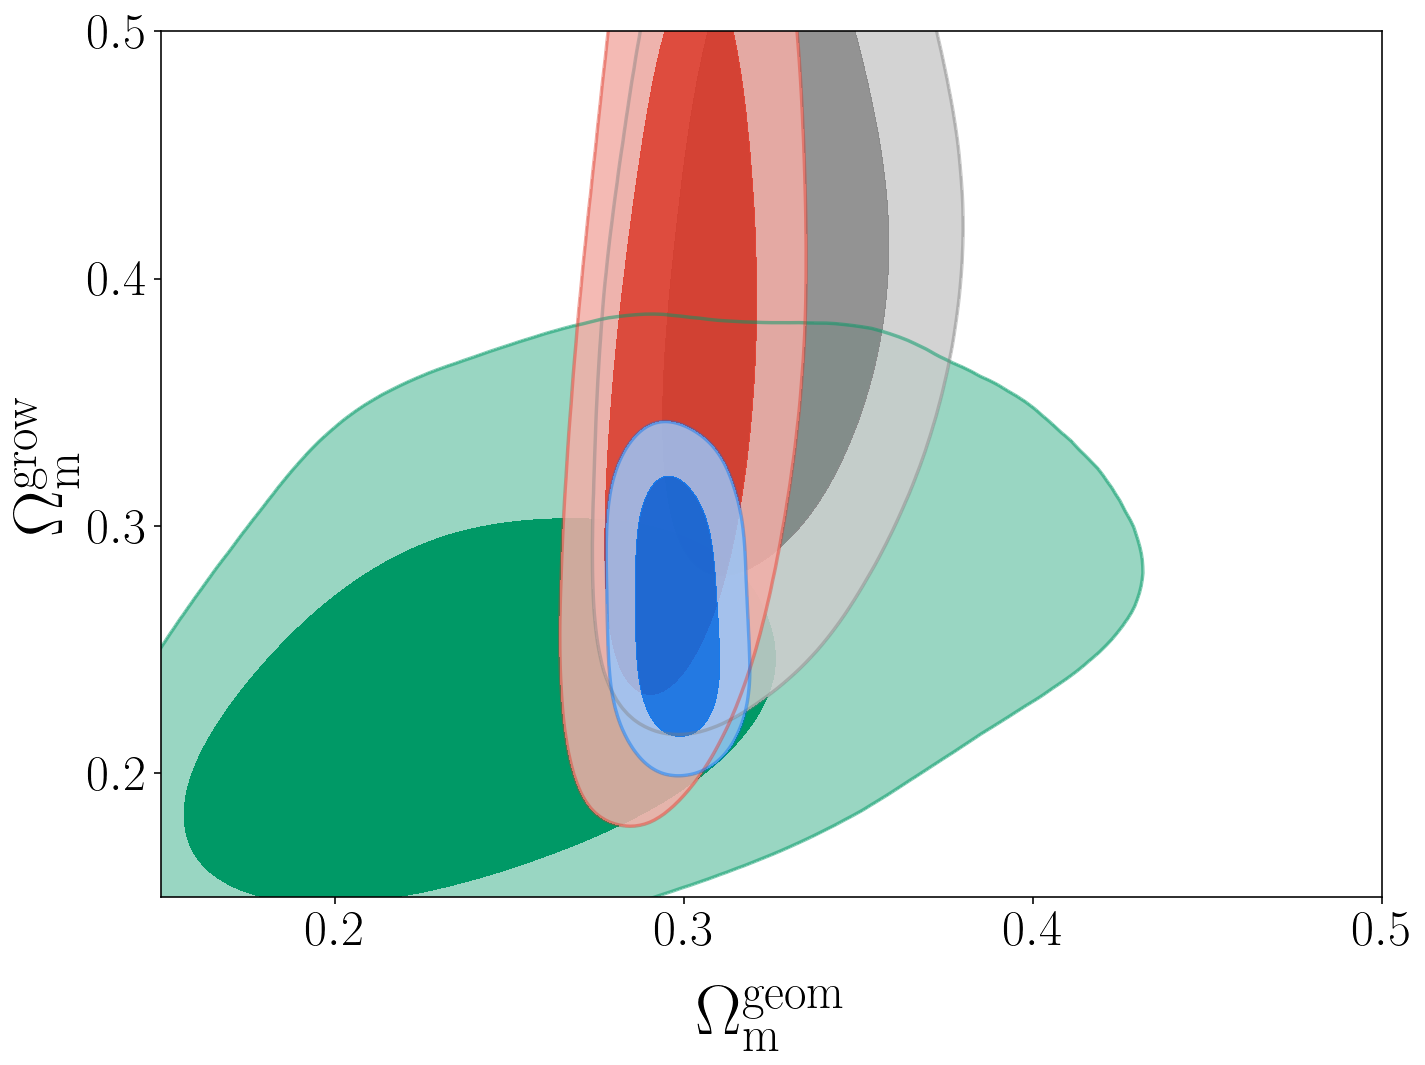

In [19]:
g = plots.get_single_plotter(width_inch=10)
g.settings.axes_fontsize=25
g.settings.axes_labelsize = 35
g.settings.legend_fontsize = 25
#g.add_legend(['WL', 'WL+Clustering', r'WL+Clustering+Ly$\alpha$', r'WL+Clustering+Ly$\alpha$+CMB'], 
#             colored_text=['green', 'black', 'red','blue'])
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'Omega_m_geo', 'Omega_m_gro', lims= lims4, filled=True);

g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/wmwm.png')

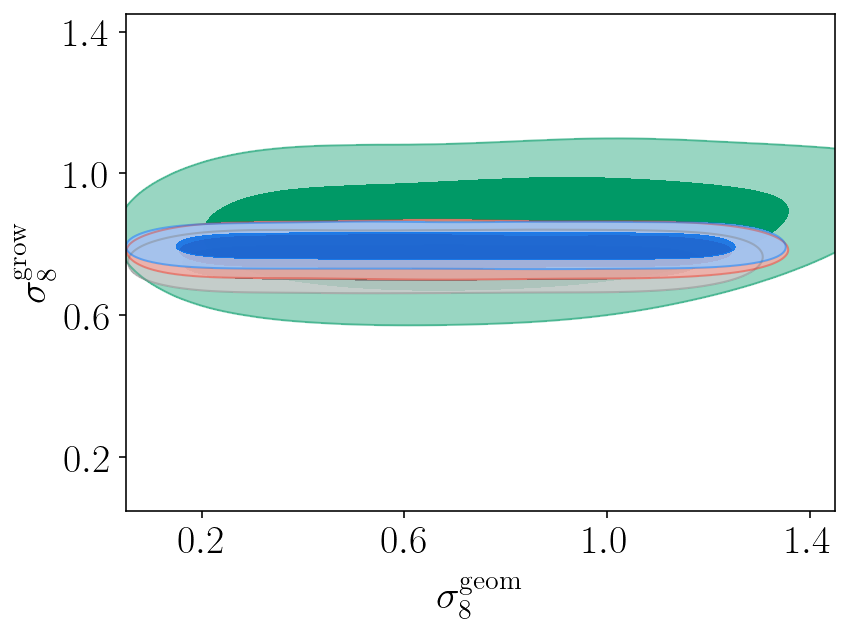

In [20]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'sigma8_geo', 'sigma8_gro', lims= lims5, filled=True);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/sigsig.png')

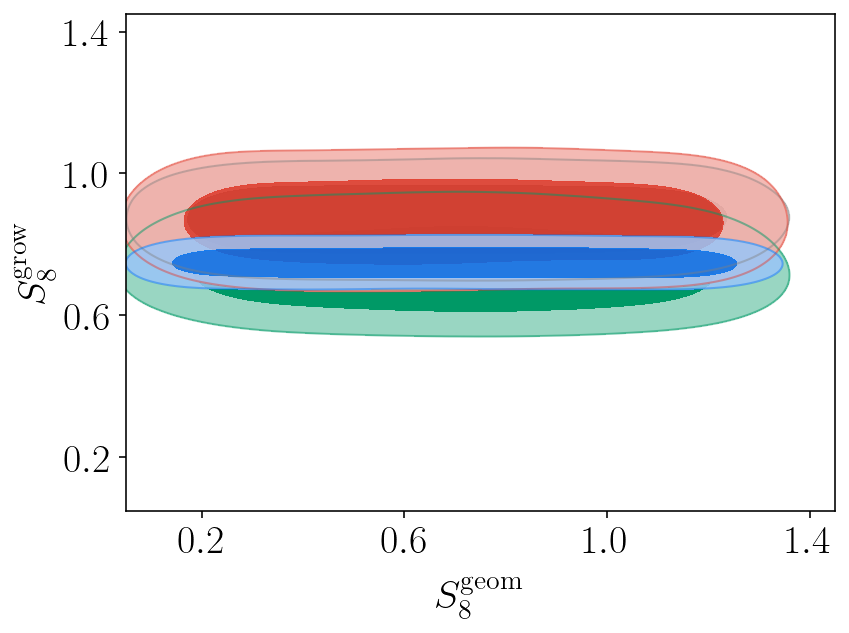

In [21]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([K1K_comp, K1K_Cl_comp, K1K_ClLy_comp, K1K_ClLyC_comp],
          'S8_geo', 'S8_gro', lims= lims5, filled=True);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/S8S8.png')

# 1D&2D Plots

In [22]:
lims1 = [0.15, 0.5, 0.4, 1.5]
lims2 = [0.15, 0.5, 0.65, 0.82]
lims3 = [0., 0.7]
lims4 = [0, 1.5]
lims5 = [ 0.64,   0.82]

plot = {'K1K': [K1K_gro, K1K_geo, K1K, planck],
         'K1K_Cl': [K1K_Cl_gro, K1K_Cl_geo, K1K_Cl, planck],
         'K1K_ClLy':[K1K_ClLy_gro, K1K_ClLy_geo, K1K_ClLy, planck],
         'K1K_ClLyC':  [K1K_ClLyC_gro, K1K_ClLyC_geo, K1K_ClLyC, planck]}

In [23]:
name = 'K1K_ClLyC'

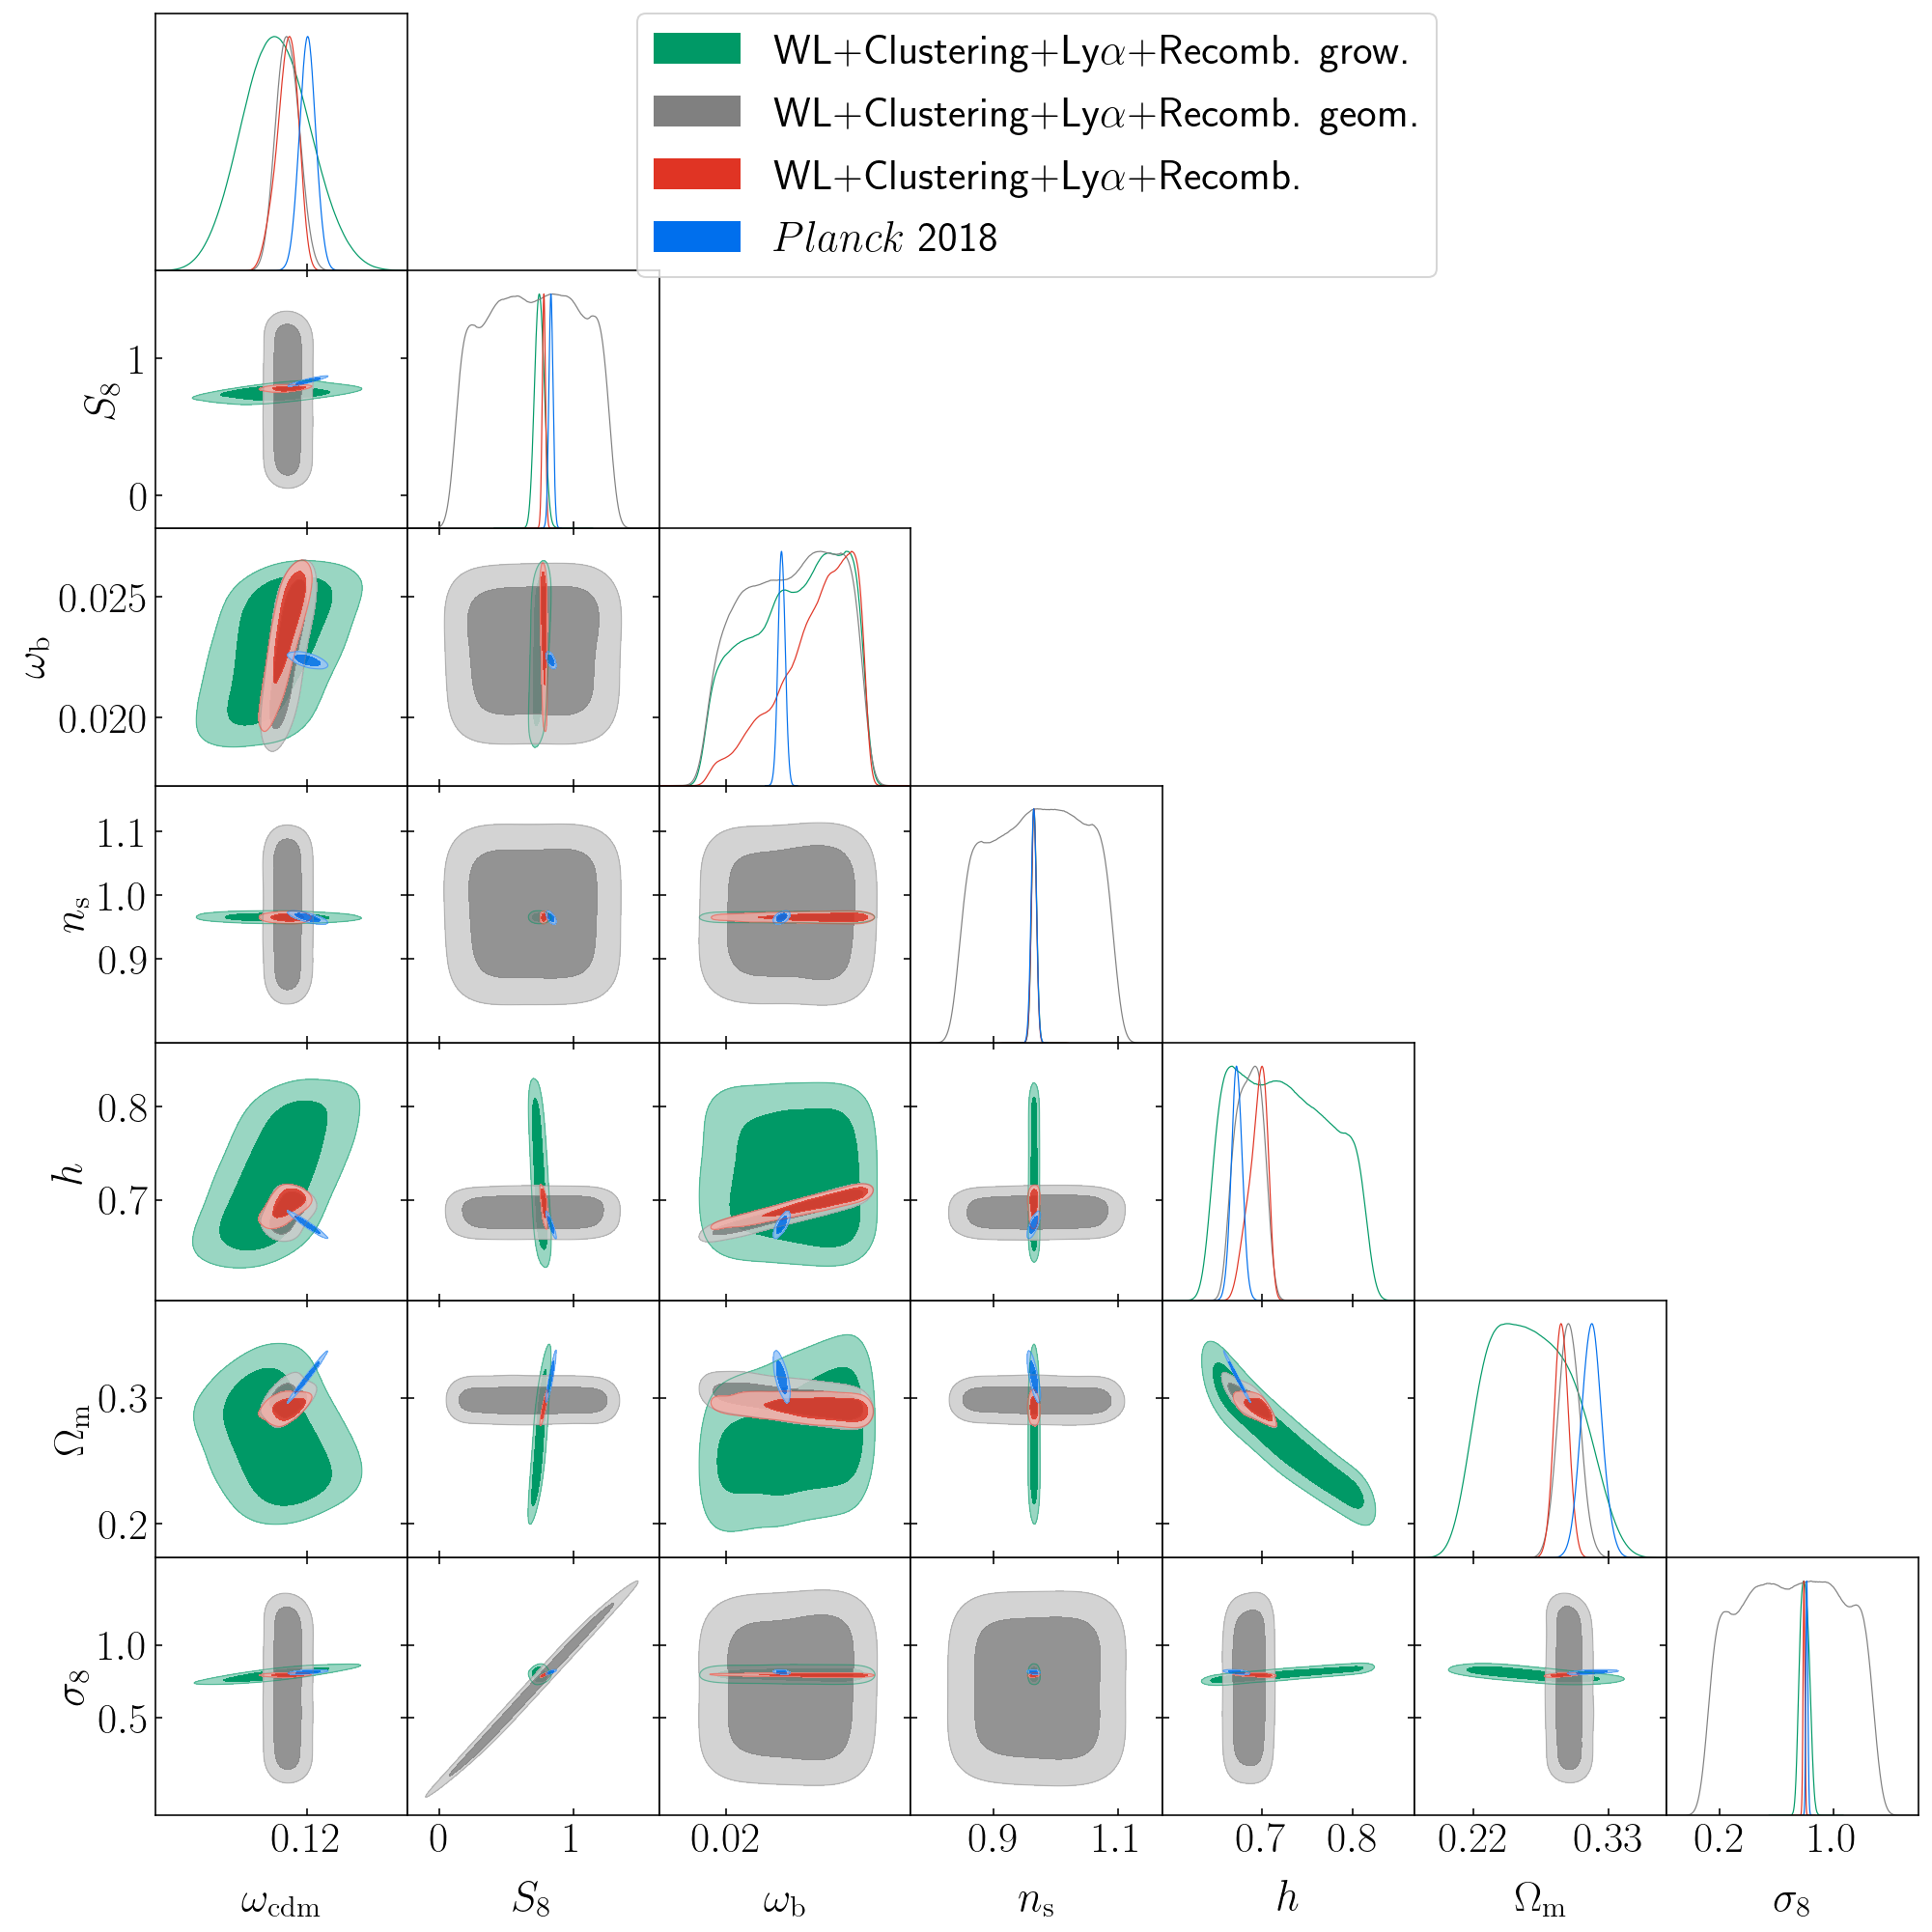

In [24]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot(plot[name], filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/{}_triangle.pdf'.format(name))

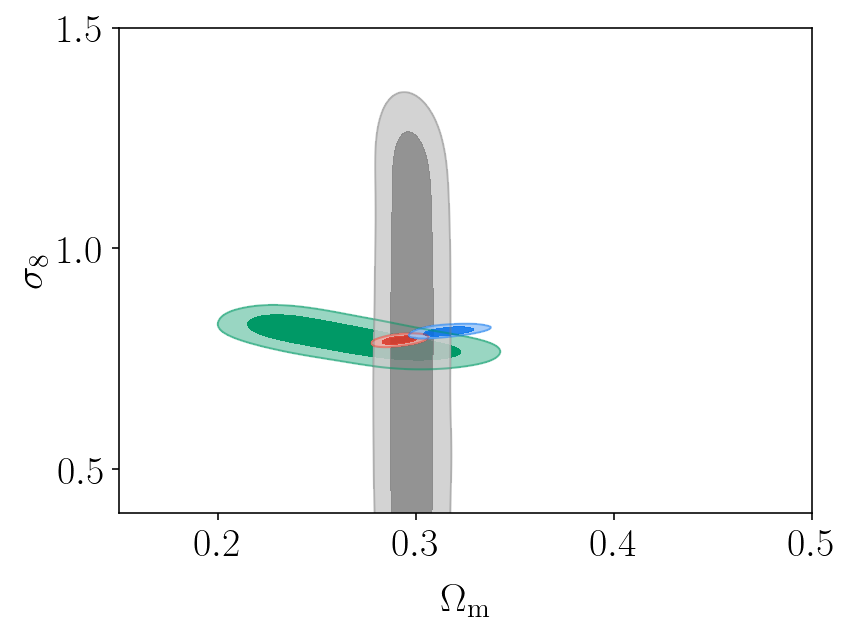

In [25]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d(plot[name], 'Omega_m', 'sigma8', filled=True, lims=lims1);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'_wmsig.png')

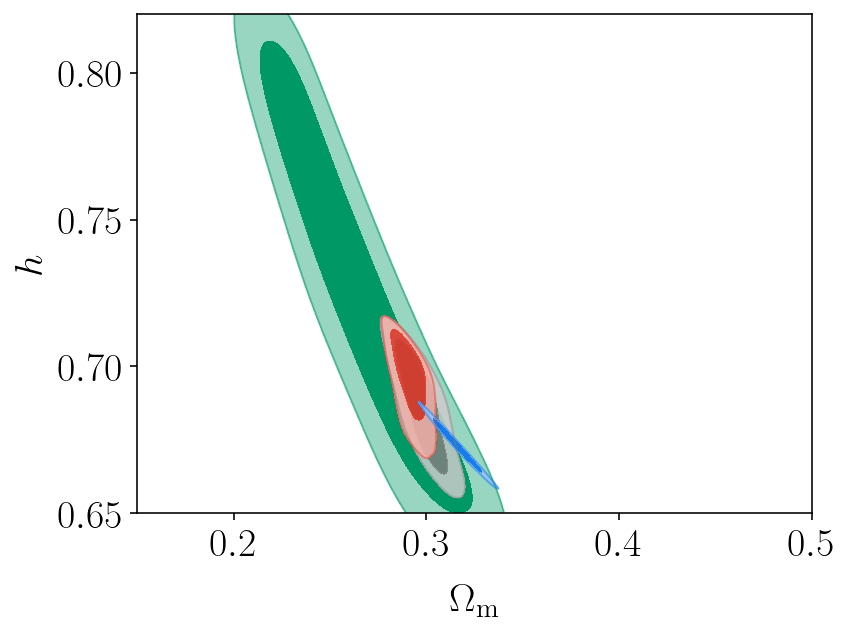

In [26]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d(plot[name],'Omega_m', 'h', filled=True, lims=lims2);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'_wmh.png')

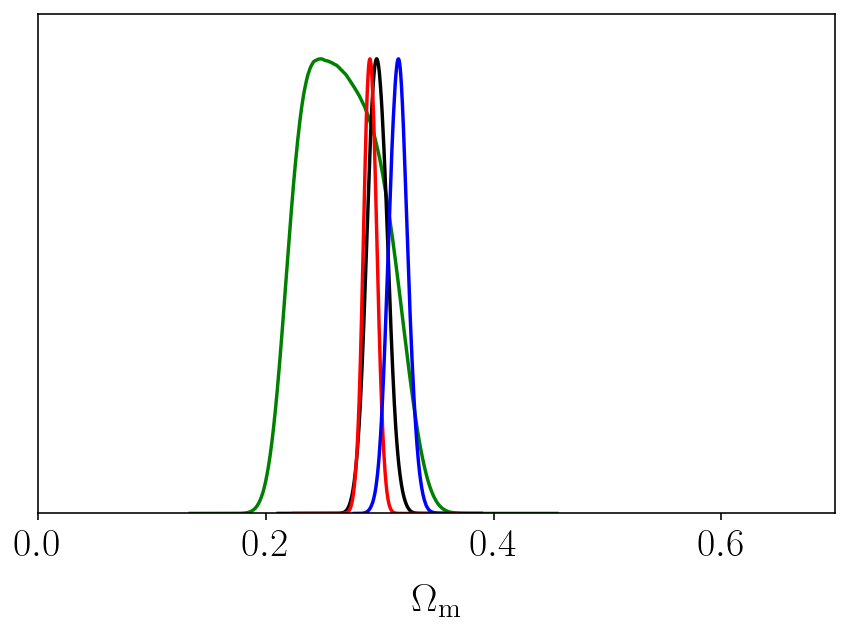

In [27]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name],'Omega_m', 
          colors=['green', 'black', 'red','blue'],
          lims=lims3);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'wm'+'.png')

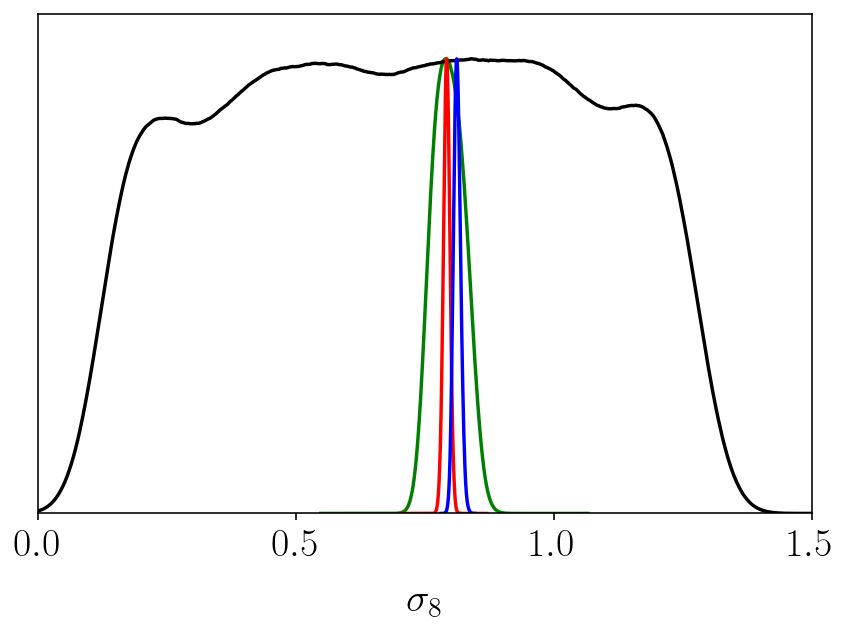

In [28]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name], 'sigma8', 
          colors=['green', 'black', 'red','blue'], 
          lims=lims4);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'sig'+'.png')

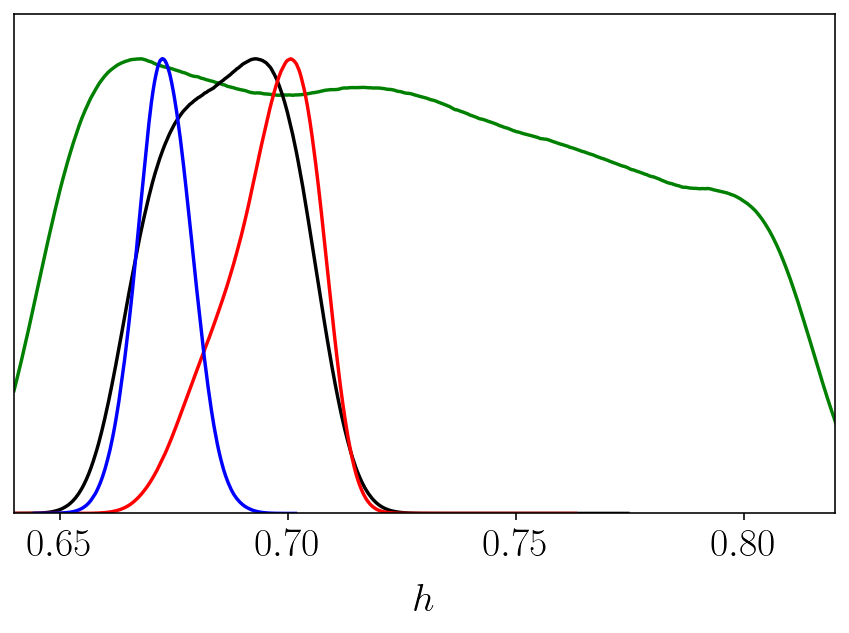

In [29]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d(plot[name], 'h',
          colors=['green', 'black', 'red','blue'],
          lims=lims5);
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/'+name+'h'+'.png')

# Appendix plots

In [30]:
plot = {'BOSS': [BOSS, K1K, K1K_Cl, planck],
         'Lya': [Lya, K1K, K1K_Ly, planck],
         'CMB':[CMB, K1K, K1K_CMB, planck]}

name = 'CMB'

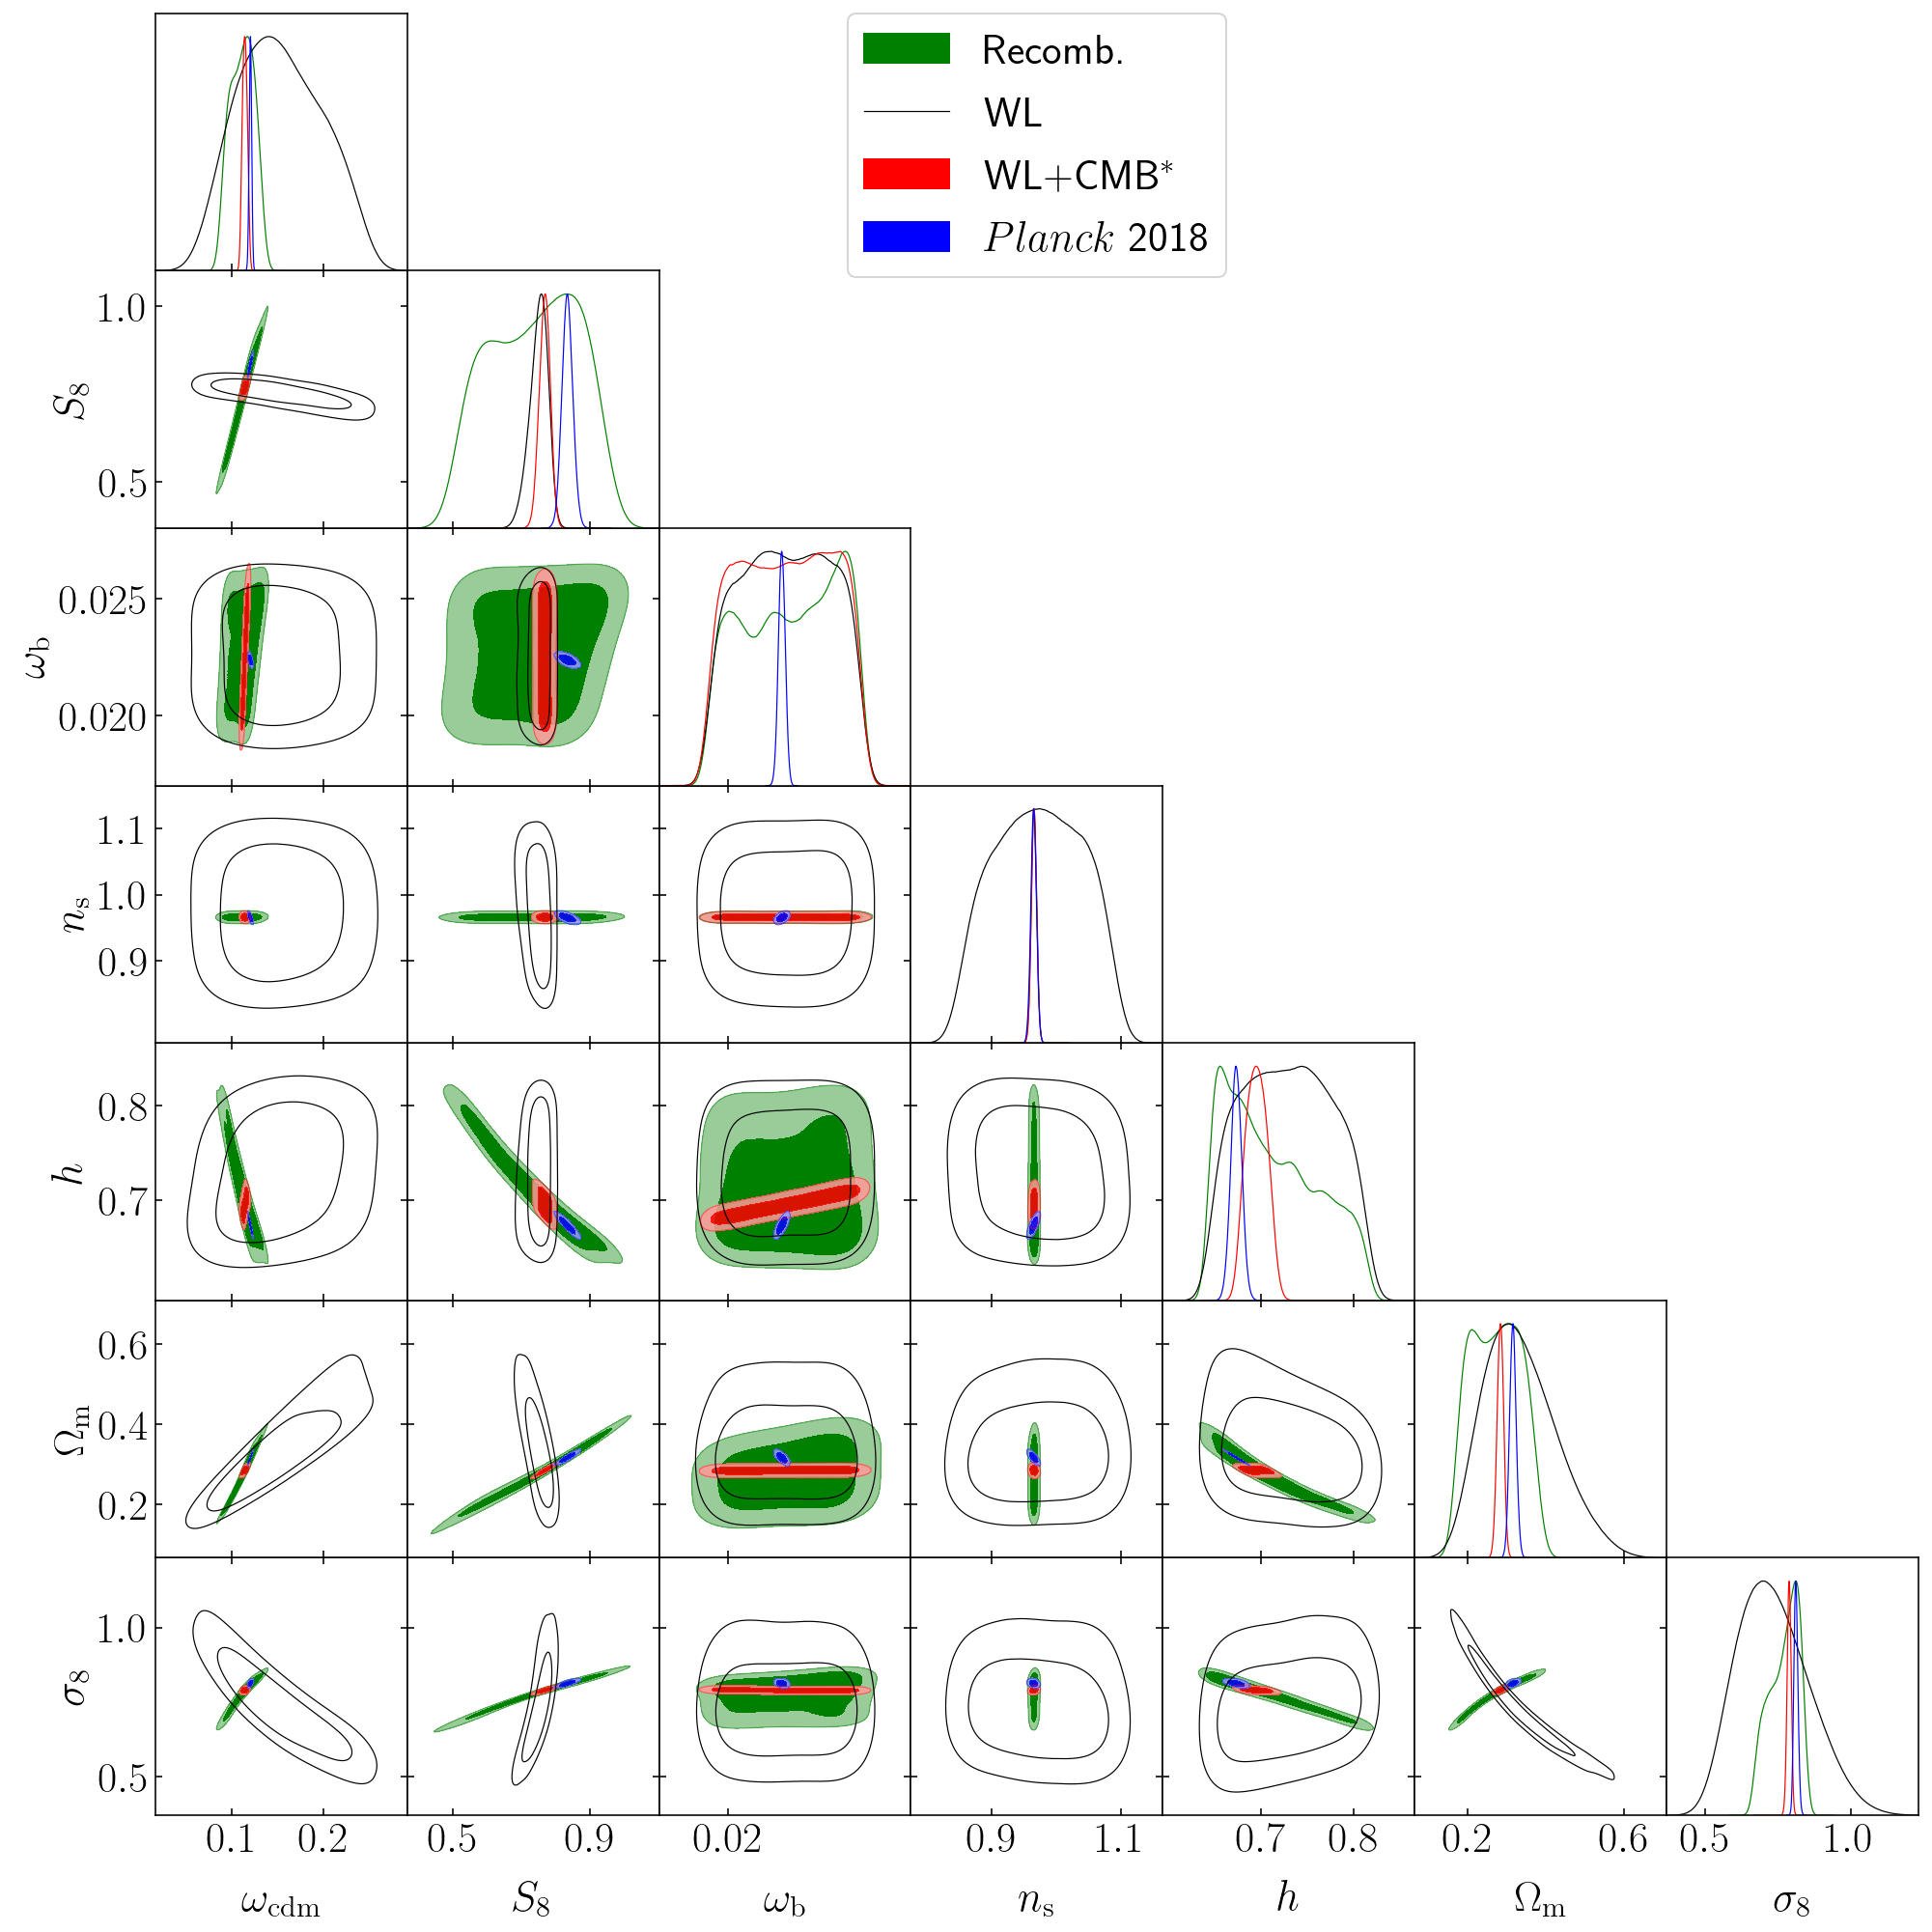

In [31]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot(plot[name], colors=['green', 'black', 'red','blue'],
                contour_colors=['green', 'black', 'red','blue'],
                filled=[True, False, True, True])
g.export('/mnt/c/Users/Jaime/Desktop/paper_plots/{}_triangle.pdf'.format(name))

In [32]:
def munch_CMB_test(path):
    chain = np.loadtxt(path+'/chain_NS__accepted.txt')
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = np.array([cols[11], cols[5], cols[10]])
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=[ 'ln10^{10}A_s', 'ns', '100theta_s'], 
                        labels=['ln10^{10}A_s', 'ns',  '100theta_star'],
                        label = 'CMB',
                        weights=weights, loglikes=loglikes)
    return samples

def munch_planck_test():
    chain = planck_tot
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    param_cols = np.array([cols[6], cols[7],  cols[56]]) #4
    param_rows = np.transpose(param_cols)
    samples = MCSamples(samples=param_rows, names=[ 'ln10^{10}A_s', 'ns', '100theta_s'], 
                        labels=[ 'ln10^{10}A_s', 'ns', '100theta_star'],
                        label = 'Planck',
                        weights=weights, loglikes=loglikes)
    return samples

In [33]:
CMB_test = munch_CMB_test('CMB')
planck_test = munch_planck_test()

Removed no burn in
Removed no burn in


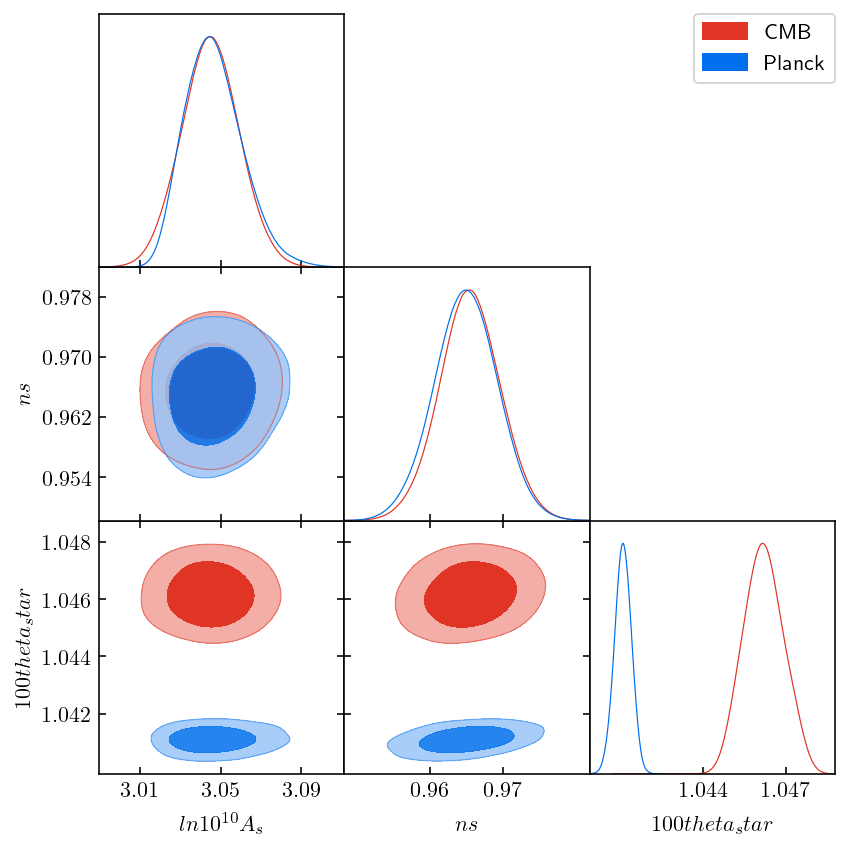

In [34]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 14
g.settings.legend_fontsize = 14
g.settings.axes_labelsize = 14
g.triangle_plot([CMB_test, planck_test], filled=True)

In [35]:
print(BOSS.getMargeStats())

Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
omega_cdm   1.7015279E-01  3.7085254E-02  1.2850397E-01  2.0506480E-01  two    1.0317180E-01  2.4388530E-01  two    9.0839000E-02  2.5294930E-01  two     \omega_{\rm{cdm}}
S_8         8.6697232E-01  6.6818608E-02  8.0152910E-01  9.3387340E-01  two    7.4001320E-01  9.9939680E-01  two    6.9928170E-01  1.0431930E+00  two     S_{\rm{8}}
omega_b     2.2566838E-02  2.0185286E-03  1.9565958E-02  2.5543793E-02  two    1.9181410E-02  2.5835930E-02  two    1.9036810E-02  2.5955640E-02  two     \omega_{\rm{b}}
n_s         9.7253414E-01  7.5076150E-02  8.6082500E-01  1.0845073E+00  two    8.4626490E-01  1.0935190E+00  two    8.4120080E-01  1.0991030E+00  two     n_{\rm{s}}
h           7.2297365E-01  3.2904705E-02  6.8797512E-01  7.5548436E-01  two    6.6058530E-01  7.8728150E-01  two    6.4824980E-01  8.00